In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Functions

In [2]:
def Franson_interferometer(E0, t, phase, delay):
    E1 = np.zeros(len(t))

    Ein = np.array([E0, E1])

    interferometer_phase_shift = phase
    BS = np.sqrt(1/2)*np.array([[1, 1j], [1j, 1]])
    interferometer_phase = np.array([[1, 0], [0, 1*np.exp(1j*interferometer_phase_shift)]]) # constant phase shift, need to add delay later

    E_int = np.einsum('oi, it -> ot', BS, Ein)

    E_int = np.einsum('oi, it -> ot', interferometer_phase, E_int) # constant phase shift
    E_int[1] = np.roll(E_int[1], int(delay/t[-1] * len(t))) # relative delay

    Eout = np.einsum('oi, it -> ot', BS, E_int)

    return Eout # (port, t)

# Import experimental data

In [3]:
_freq = np.loadtxt('FrequencyOfSignalScan.csv')
_transmission = np.loadtxt('AmplitudeWithControlOn.csv')

In [4]:
freq = _freq[~np.isnan(_freq)]
transmission = _transmission[~np.isnan(_freq)]

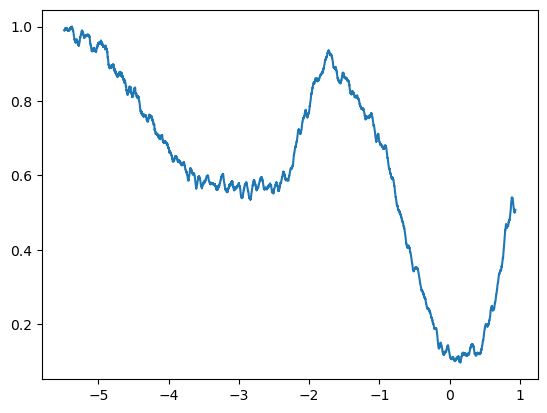

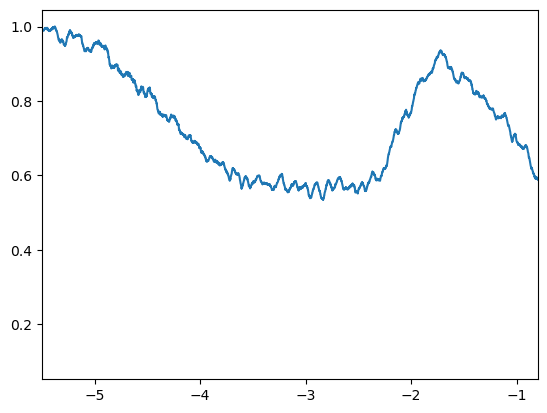

In [5]:
plt.plot(freq, transmission)
plt.show()

plt.plot(freq, transmission)
plt.xlim(-5.5, -0.8)
plt.show()

# Import data (OD = 5721, Omega_max=6)

Unpack contents of directory

In [6]:
directory = u'\\\\?\\R:\\home\\MEVeS\\Phase_switching\\Hyperfine_splitting_OD=5721_Omega=6\\'

num_files = len(os.listdir(directory))

file_array = np.empty((num_files, 4), dtype=object) # [deltaS, deltaC, control_factor, file_name]

for i, file in enumerate(os.listdir(directory)):
    start = '_deltaS='
    end = '_deltaC'
    deltaS = float((file[file.find(start)+len(start):file.rfind(end)]).replace('p', '.'))
    start = '_deltaC='
    end = '_control'
    deltaC = float((file[file.find(start)+len(start):file.rfind(end)]).replace('p', '.'))
    start = '_control_factor='
    end = '.txt'
    control_factor = float((file[file.find(start)+len(start):file.rfind(end)]).replace('p', '.'))
    file_array[i] = [deltaS, deltaC, control_factor, file]

## Pick out single shot

In [7]:
deltaS_list, deltaS_idx = np.unique(file_array[:, 0], return_index=True)
deltaC_list, deltaC_idx = np.unique(file_array[:, 1], return_index=True)
control_factor_list, control_factor_idx = np.unique(file_array[:, 2], return_index=True)

In [8]:
dS = 0
dC = 0
cf = -3

print("deltaS = ", deltaS_list[dS])
print("deltaC = ", deltaC_list[dC])
print("control factor = ", control_factor_list[cf])

file = file_array[(file_array[:, 0] == deltaS_list[dS]) & (file_array[:, 1] == deltaC_list[dC]) & (file_array[:, 2] == control_factor_list[cf]), 3]

print("file to load = ", file[0])

deltaS =  -5.5
deltaC =  1.4
control factor =  0.9332121580963265
file to load =  absorption_deltaS=-5p5_deltaC=1p4_control_factor=0p9332121580963265.txt


In [9]:
m = 5000
tend = 50e-9
t = np.linspace(0, tend, m)
ton = 1e-9

Eout = np.loadtxt(directory + file[0], dtype=complex)

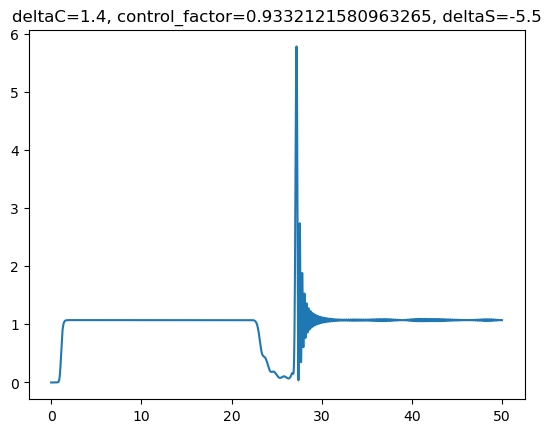

In [10]:
plt.plot(t*1e9, np.abs(Eout[:, 0])**2 + np.abs(Eout[:, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.show()

## Pick out section

In [11]:
dC = 9
cf = 13

print("deltaC = ", deltaC_list[dC])
print("control factor = ", control_factor_list[cf])

deltaC =  1.5894736842105264
control factor =  0.5368135804516109


In [12]:
files = file_array[(file_array[:, 1] == deltaC_list[dC]) & (file_array[:, 2] == control_factor_list[cf]), 3]

print("files to load = ", files)

files to load =  ['absorption_deltaS=-4p040816326530612_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-2p693877551020408_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-4p714285714285714_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-0p7857142857142856_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-3p0306122448979593_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-1p0102040816326534_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-4p6020408163265305_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-4p4897959183673475_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-3p5918367346938775_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-1p4591836734693882_d

In [13]:
Eout_array = np.zeros((len(files), m, 2), dtype=complex)
deltaS_list = np.zeros(len(files))

for i in range(len(files)):
    file = files[i]
    start = '_deltaS='
    end = '_deltaC'
    deltaS = float((file[file.find(start)+len(start):file.find(end)]).replace('p', '.'))
    deltaS_list[i] = deltaS
    Eout_array[i] =  np.loadtxt(directory + file, dtype=complex)

In [14]:
idx = np.argsort(deltaS_list)

Eout_array = Eout_array[idx]
deltaS_list = deltaS_list[idx]

print("deltaS list = ", deltaS_list)

deltaS list =  [-5.5        -5.3877551  -5.2755102  -5.16326531 -5.05102041 -4.93877551
 -4.82653061 -4.71428571 -4.60204082 -4.48979592 -4.37755102 -4.26530612
 -4.15306122 -4.04081633 -3.92857143 -3.81632653 -3.70408163 -3.59183673
 -3.47959184 -3.36734694 -3.25510204 -3.14285714 -3.03061224 -2.91836735
 -2.80612245 -2.69387755 -2.58163265 -2.46938776 -2.35714286 -2.24489796
 -2.13265306 -2.02040816 -1.90816327 -1.79591837 -1.68367347 -1.57142857
 -1.45918367 -1.34693878 -1.23469388 -1.12244898 -1.01020408 -0.89795918
 -0.78571429 -0.67346939 -0.56122449 -0.44897959 -0.33673469 -0.2244898
 -0.1122449   0.        ]


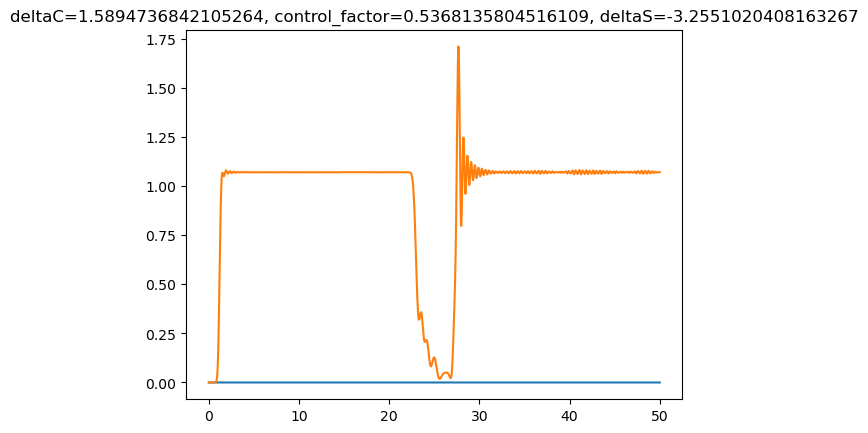

In [15]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array[dS, :, 0])**2)
plt.plot(t*1e9, np.abs(Eout_array[dS, :, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.show()

## Franson delay 6ns

In [16]:
delay = 6 # ns

Eout_array_Franson = np.zeros((len(files), 2, m), dtype=complex)

for i in range(len(files)):
    Eout_array_Franson[i] = Franson_interferometer(Eout_array[i, :, 1], t, 0, delay*1e-9)

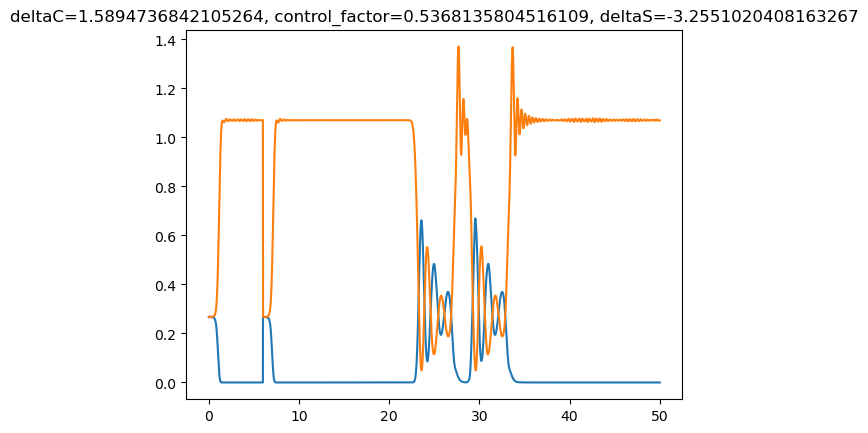

In [17]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2)
plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.show()

In [18]:
tw = 2
tc = 25

num_points = 4
offset = 0
times1 = 1e-9*np.linspace(tc-tw/2, tc+tw/2, num_points) + offset
times2 = 1e-9*np.linspace(tc-tw/2+delay, tc+tw/2+delay, num_points) + offset

points = np.array([np.argmin(np.abs(t[:, None] - times1[None, :]), axis=0), np.argmin(np.abs(t[:, None] - times2[None, :]), axis=0) ])

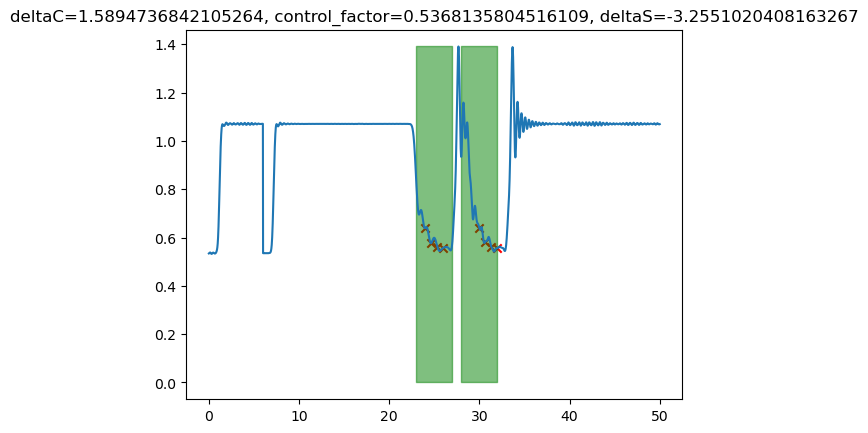

In [19]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

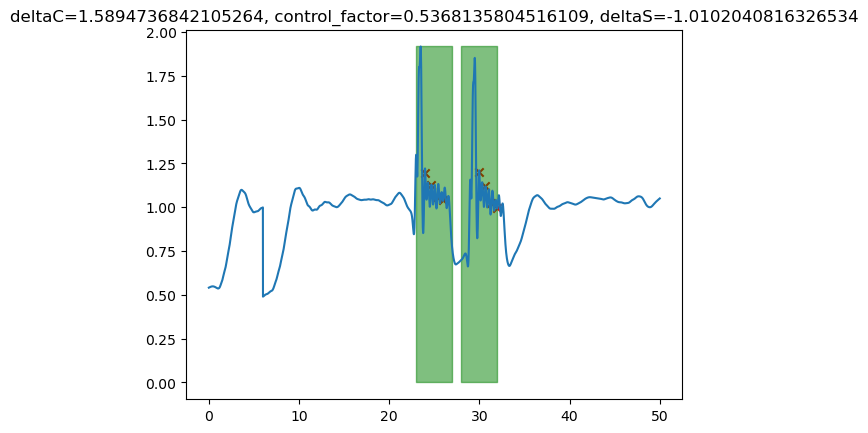

In [20]:
dS = 40

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

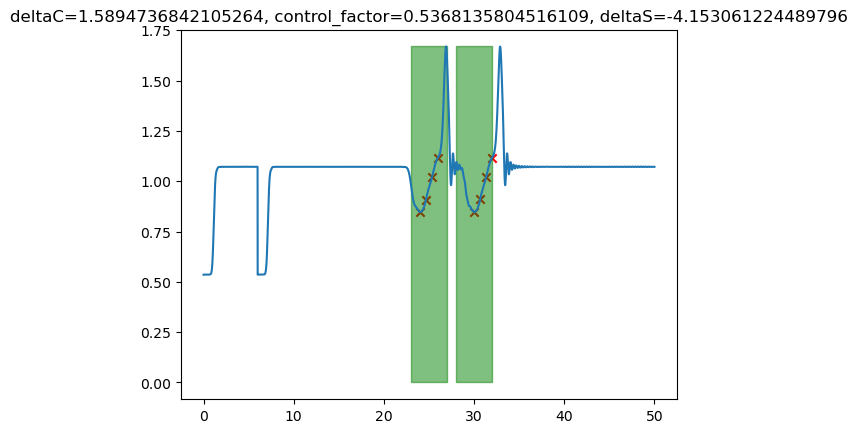

In [21]:
dS = 12

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

In [22]:
absorption = np.sum(np.abs(Eout_array_Franson[:, 0, points.flatten()])**2 + 
                    np.abs(Eout_array_Franson[:, 1, points.flatten()])**2 , axis=-1) # [deltaC, control_factor, deltaS]
absorption = absorption/np.max(absorption[deltaS_list < -0.8])

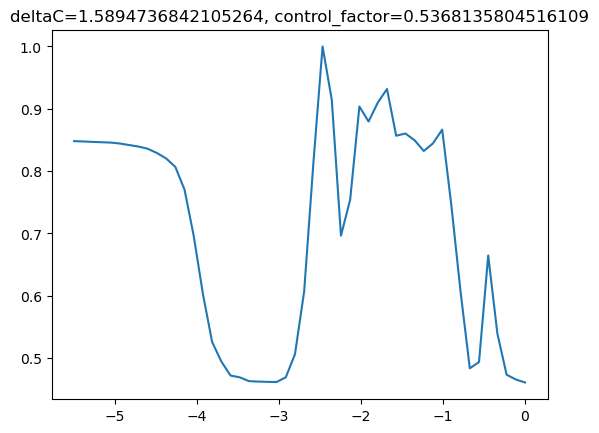

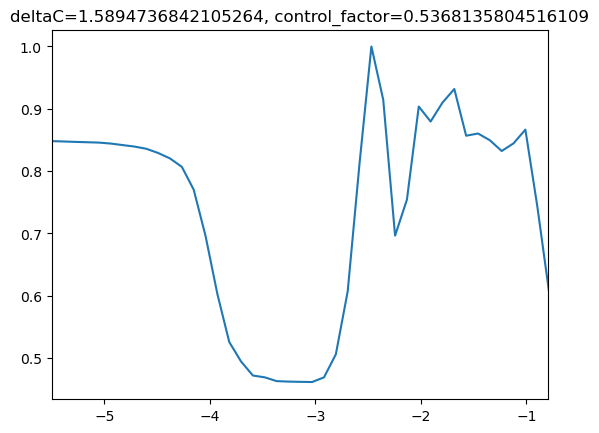

In [23]:
plt.plot(deltaS_list, absorption)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}')
plt.show()

plt.plot(deltaS_list, absorption)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}')
plt.xlim(-5.5, -0.8)
plt.show()

In [24]:
phase_on_franson = np.sum(2*np.arctan(np.sqrt((np.abs(Eout_array_Franson[:, 1, points.flatten()])**2)/(np.abs(Eout_array_Franson[:, 0, points.flatten()])**2))), axis=-1)/len(points.flatten())

idx = np.argmin(np.abs(t-15e-9))
# phase_off_franson = 2*np.arctan(Eout_array_sorted[:, :, :, 1, idx]/Eout_array_sorted[:, :, :, 0, idx])
phase_off_franson = 2*np.arctan(np.sqrt(np.abs(Eout_array_Franson[:, 1, idx])**2)/(np.abs(Eout_array_Franson[:, 0, idx])**2))

phase_shift_franson = (phase_on_franson - phase_off_franson)

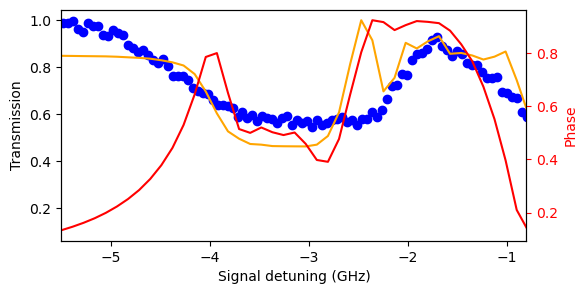

In [25]:
step = 50
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plotting the amplitude on the left y-axis
ax1.plot(deltaS_list, absorption, color='orange')
ax1.scatter(freq[::step], transmission[::step], color='blue')
ax1.set_xlabel('Signal detuning (GHz)')
ax1.set_ylabel('Transmission')

# Creating a second y-axis for phase on the right
ax2 = ax1.twinx()
ax2.plot(deltaS_list, -phase_shift_franson/np.pi, color='red')
#ax2.plot(deltaS_list, phase_shift_franson/np.pi, color='pink')
ax2.set_ylabel('Phase', color='red')
ax2.tick_params('y', colors='red')

plt.xlim(-5.5, -0.8)

# Show the plot
plt.show()

### Make points 1ns earlier

In [60]:
tw = 2
tc = 25

num_points = 4
offset = -1e-9
times1 = 1e-9*np.linspace(tc-tw/2, tc+tw/2, num_points) + offset
times2 = 1e-9*np.linspace(tc-tw/2+delay, tc+tw/2+delay, num_points) + offset

points = np.array([np.argmin(np.abs(t[:, None] - times1[None, :]), axis=0), np.argmin(np.abs(t[:, None] - times2[None, :]), axis=0) ])

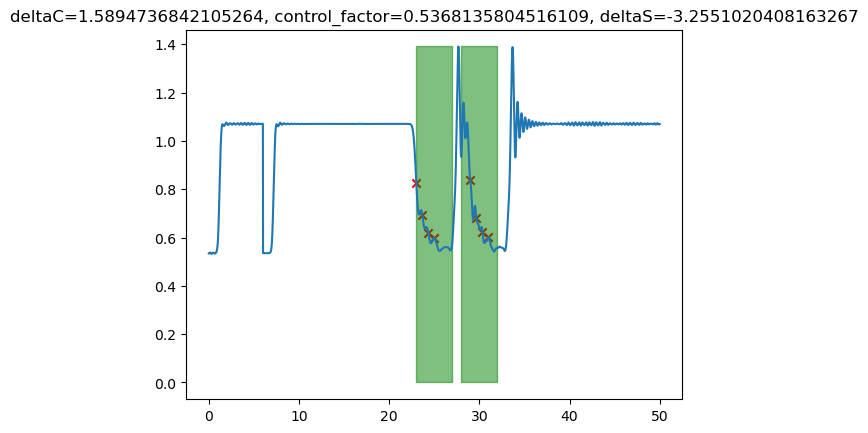

In [61]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

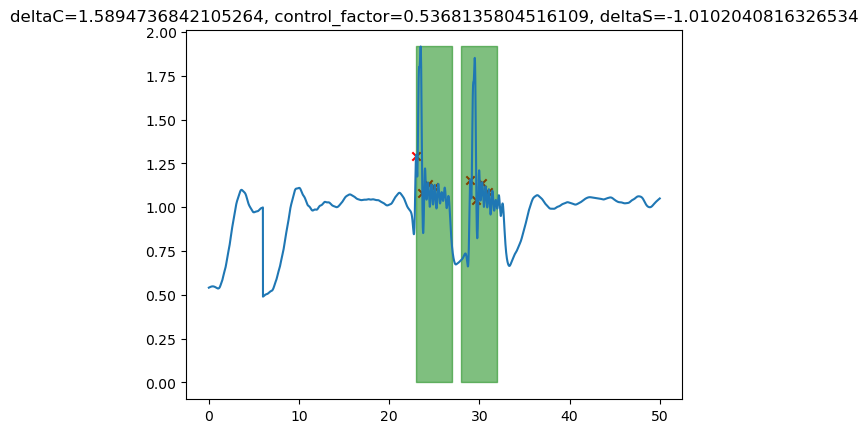

In [62]:
dS = 40

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

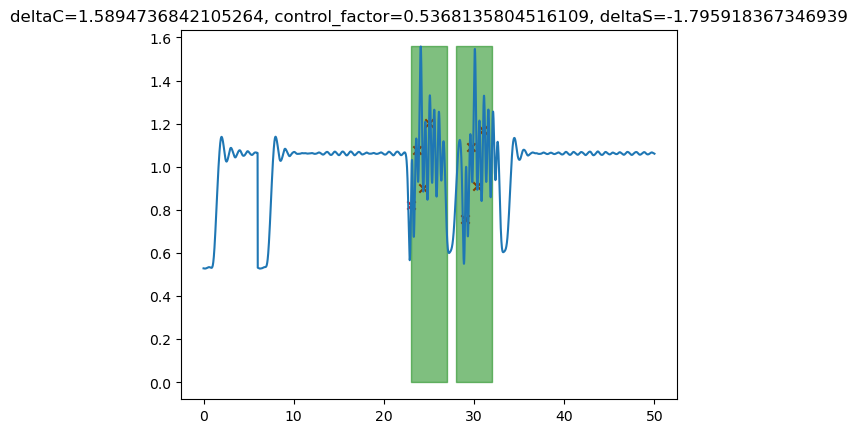

In [63]:
dS = 33

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

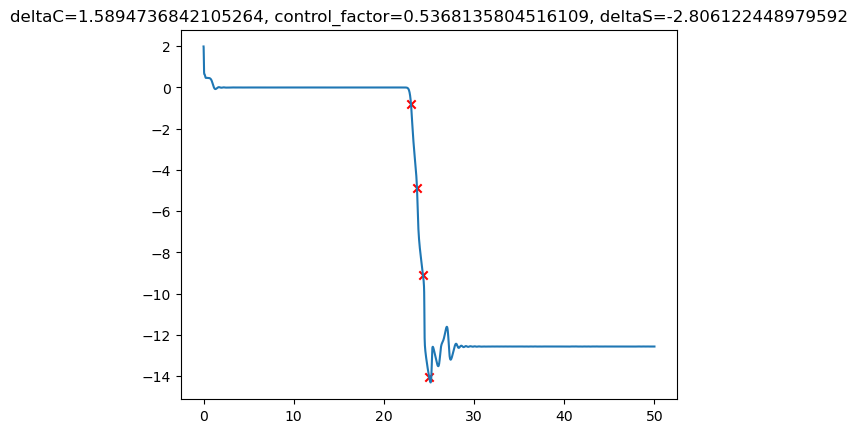

In [64]:
dS = 24

idx = np.argmin(np.abs(t-15e-9))

plt.plot(t*1e9, np.unwrap(np.angle(Eout_array[dS, :, 1]), axis=-1)-np.unwrap(np.angle(Eout_array[dS, :, 1]), axis=-1)[idx])
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.unwrap(np.angle(Eout_array[dS, :, 1]), axis=-1)-np.unwrap(np.angle(Eout_array[dS, :, 1]), axis=-1)[idx])[points[0]], marker='x', color='r')
plt.show()

In [65]:
absorption = np.sum(np.abs(Eout_array_Franson[:, 0, points.flatten()])**2 + 
                    np.abs(Eout_array_Franson[:, 1, points.flatten()])**2 , axis=-1) # [deltaC, control_factor, deltaS]
absorption = absorption/np.max(absorption[deltaS_list < -0.8])

In [66]:
phase_on_franson = np.sum(2*np.arctan(np.sqrt((np.abs(Eout_array_Franson[:, 1, points.flatten()])**2)/(np.abs(Eout_array_Franson[:, 0, points.flatten()])**2))), axis=-1)/len(points.flatten())

idx = np.argmin(np.abs(t-15e-9))
# phase_off_franson = 2*np.arctan(Eout_array_sorted[:, :, :, 1, idx]/Eout_array_sorted[:, :, :, 0, idx])
phase_off_franson = 2*np.arctan(np.sqrt(np.abs(Eout_array_Franson[:, 1, idx])**2)/(np.abs(Eout_array_Franson[:, 0, idx])**2))

phase_shift_franson = (phase_on_franson - phase_off_franson)

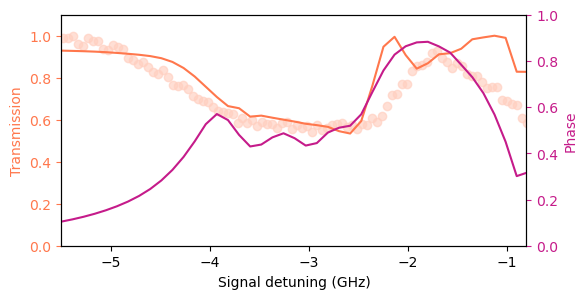

In [67]:
step = 50
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plotting the amplitude on the left y-axis
ax1.plot(deltaS_list, absorption, color='#FF774Cff')
ax1.scatter(freq[::step], transmission[::step], color='#FFCFC0aa')
ax1.set_xlabel('Signal detuning (GHz)')
ax1.set_ylabel('Transmission', color='#FF774Cff')
ax1.tick_params('y', colors='#FF774Cff')
ax1.set_ylim([0, 1.1])

# Creating a second y-axis for phase on the right
ax2 = ax1.twinx()
ax2.plot(deltaS_list, -phase_shift_franson/np.pi, color='#c51b8aff')
#ax2.plot(deltaS_list, phase_shift_franson/np.pi, color='pink')
ax2.set_ylabel('Phase', color='#c51b8aff')
ax2.tick_params('y', colors='#c51b8aff')
ax2.set_ylim([0, 1])

plt.xlim(-5.5, -0.8)

# Show the plot
plt.savefig('full_hyperfine_post_Franson_total_transmission_and_phase_shift.pdf') 
plt.show()

data_to_save = np.column_stack((deltaS_list, absorption, -phase_shift_franson/np.pi))
np.savetxt(f'full_hyperfine_post_Franson_total_transmission_and_phase_shift.txt', data_to_save)

### Vary points by +/- 1 ns

In [83]:
tw = 2
tc = 25

num_points = 4
offset = np.array([-1e-9, 0, 1e-9])
times1 = 1e-9*np.linspace(tc-tw/2, tc+tw/2, num_points)[None, :] + offset[:, None]
times2 = 1e-9*np.linspace(tc-tw/2+delay, tc+tw/2+delay, num_points)[None, :] + offset[:, None]

points = np.array([np.argmin(np.abs(t[:, None, None] - times1[None, :, :]), axis=0), np.argmin(np.abs(t[:, None, None] - times2[None, :, :]), axis=0) ]).transpose(1, 0, 2)

In [87]:
points.shape # (offset, 1st/2nd bin, num_points)

(3, 2, 4)

In [89]:
np.abs(Eout_array_Franson[:, 0, points.reshape(len(offset), -1)]).shape # (frequency, offset, points)

(50, 3, 8)

In [90]:
absorption = np.sum(np.abs(Eout_array_Franson[:, 0, points.reshape(len(offset), -1)])**2 + 
                    np.abs(Eout_array_Franson[:, 1, points.reshape(len(offset), -1)])**2 , axis=-1) # (frequency, offset)
absorption = absorption/np.max(absorption[deltaS_list < -0.8, :], axis=0)

In [91]:
absorption.shape

(50, 3)

In [94]:
phase_on_franson = np.sum(2*np.arctan(np.sqrt((np.abs(Eout_array_Franson[:, 1, points.reshape(len(offset), -1)])**2)/(np.abs(Eout_array_Franson[:, 0, points.reshape(len(offset), -1)])**2))), axis=-1)/(2*num_points)

idx = np.argmin(np.abs(t-15e-9))
phase_off_franson = 2*np.arctan(np.sqrt(np.abs(Eout_array_Franson[:, 1, idx])**2)/(np.abs(Eout_array_Franson[:, 0, idx])**2))

phase_shift_franson = (phase_on_franson - phase_off_franson[:, None])

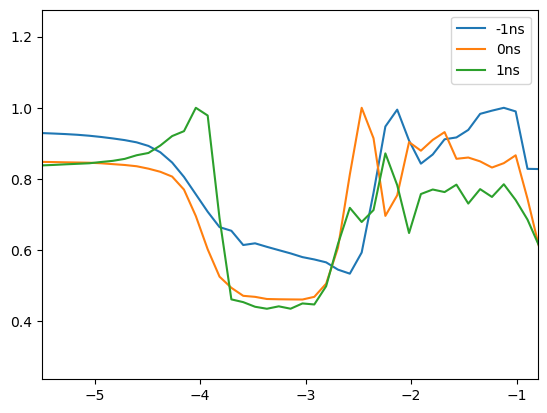

In [100]:
plt.plot(deltaS_list, absorption, label=['-1ns', '0ns', '1ns'])
plt.xlim(-5.5, -0.8)
plt.legend()
plt.show()

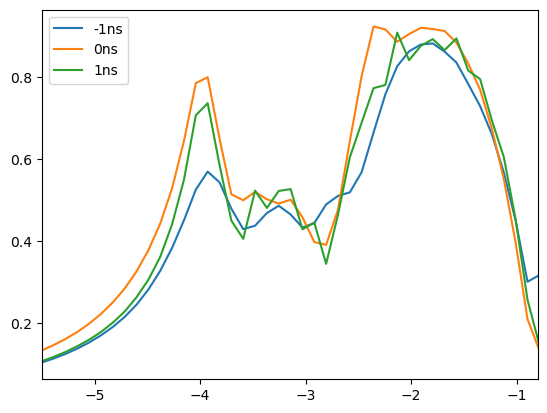

In [101]:
plt.plot(deltaS_list, -phase_shift_franson/np.pi, label=['-1ns', '0ns', '1ns'])
plt.xlim(-5.5, -0.8)
plt.legend()
plt.show()

### Detector response

In [103]:
sigma = 4e-10
gaussian_window = np.exp(-(t - tend/2)**2 / (2 * sigma**2))

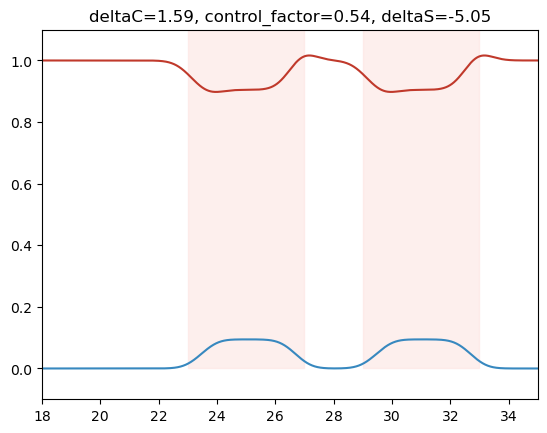

In [110]:
dS = 4

I0 = np.convolve(np.abs(Eout_array_Franson[dS, 0])**2, gaussian_window, mode='same')
I1 = np.convolve(np.abs(Eout_array_Franson[dS, 1])**2, gaussian_window, mode='same')

norm = (I0 + I1)[np.argmin(np.abs(t-18e-9))]

I0 = I0/norm
I1 = I1/norm

plt.plot(t*1e9, I0, color='#3788bfff')
plt.plot(t*1e9, I1, color='#c0392bff')
plt.title(f'deltaC={deltaC_list[dC]:.2f}, control_factor={control_factor_list[cf]:.2f}, deltaS={deltaS_list[dS]:.2f}')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+tw)) & (t*1e9 > (tc-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+delay+tw)) & (t*1e9 > (tc+delay-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.xlim(18, 35)
plt.ylim(-0.1, 1.1)

plt.savefig(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.pdf') 
plt.show()

data_to_save = np.column_stack((t*1e9, np.abs(Eout_array_Franson[dS, 0])**2, np.abs(Eout_array_Franson[dS, 1])**2))
np.savetxt(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.txt', data_to_save)

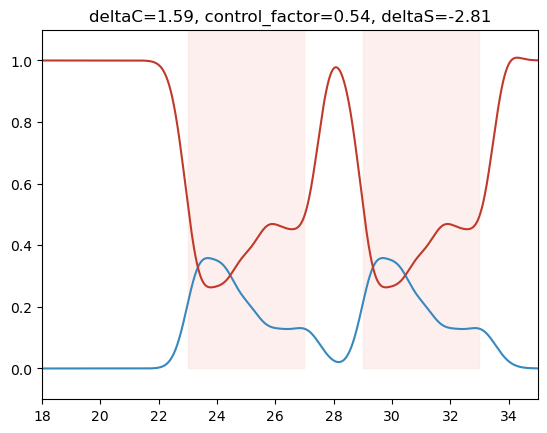

In [111]:
dS = 24

I0 = np.convolve(np.abs(Eout_array_Franson[dS, 0])**2, gaussian_window, mode='same')
I1 = np.convolve(np.abs(Eout_array_Franson[dS, 1])**2, gaussian_window, mode='same')

norm = (I0 + I1)[np.argmin(np.abs(t-18e-9))]

I0 = I0/norm
I1 = I1/norm

plt.plot(t*1e9, I0, color='#3788bfff')
plt.plot(t*1e9, I1, color='#c0392bff')
plt.title(f'deltaC={deltaC_list[dC]:.2f}, control_factor={control_factor_list[cf]:.2f}, deltaS={deltaS_list[dS]:.2f}')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+tw)) & (t*1e9 > (tc-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+delay+tw)) & (t*1e9 > (tc+delay-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.xlim(18, 35)
plt.ylim(-0.1, 1.1)

plt.savefig(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.pdf') 
plt.show()

data_to_save = np.column_stack((t*1e9, np.abs(Eout_array_Franson[dS, 0])**2, np.abs(Eout_array_Franson[dS, 1])**2))
np.savetxt(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.txt', data_to_save)

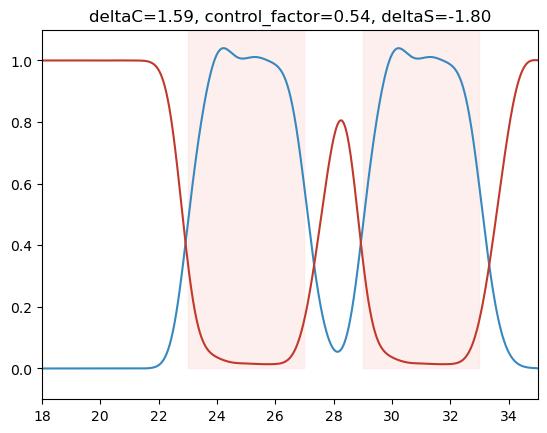

In [112]:
dS = 33

I0 = np.convolve(np.abs(Eout_array_Franson[dS, 0])**2, gaussian_window, mode='same')
I1 = np.convolve(np.abs(Eout_array_Franson[dS, 1])**2, gaussian_window, mode='same')

norm = (I0 + I1)[np.argmin(np.abs(t-18e-9))]

I0 = I0/norm
I1 = I1/norm

plt.plot(t*1e9, I0, color='#3788bfff')
plt.plot(t*1e9, I1, color='#c0392bff')
plt.title(f'deltaC={deltaC_list[dC]:.2f}, control_factor={control_factor_list[cf]:.2f}, deltaS={deltaS_list[dS]:.2f}')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+tw)) & (t*1e9 > (tc-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+delay+tw)) & (t*1e9 > (tc+delay-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.xlim(18, 35)
plt.ylim(-0.1, 1.1)

plt.savefig(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.pdf') 
plt.show()

data_to_save = np.column_stack((t*1e9, np.abs(Eout_array_Franson[dS, 0])**2, np.abs(Eout_array_Franson[dS, 1])**2))
np.savetxt(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.txt', data_to_save)

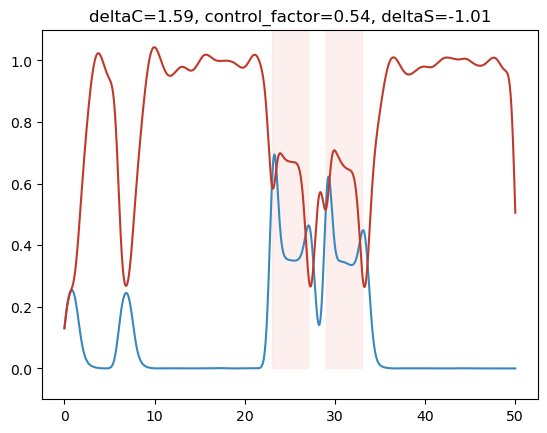

In [159]:
dS = 40

I0 = np.convolve(np.abs(Eout_array_Franson[dS, 0])**2, gaussian_window, mode='same')
I1 = np.convolve(np.abs(Eout_array_Franson[dS, 1])**2, gaussian_window, mode='same')

norm = (I0 + I1)[np.argmin(np.abs(t-18e-9))]

I0 = I0/norm
I1 = I1/norm

plt.plot(t*1e9, I0, color='#3788bfff')
plt.plot(t*1e9, I1, color='#c0392bff')
plt.title(f'deltaC={deltaC_list[dC]:.2f}, control_factor={control_factor_list[cf]:.2f}, deltaS={deltaS_list[dS]:.2f}')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+tw)) & (t*1e9 > (tc-tw)), 
                alpha=0.5, color='#fde0ddff')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t*1e9 < (tc+delay+tw)) & (t*1e9 > (tc+delay-tw)), 
                alpha=0.5, color='#fde0ddff')
#plt.xlim(18, 35)
plt.ylim(-0.1, 1.1)

#plt.savefig(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.pdf') 
plt.show()

data_to_save = np.column_stack((t*1e9, np.abs(Eout_array_Franson[dS, 0])**2, np.abs(Eout_array_Franson[dS, 1])**2))
#np.savetxt(f'full_hyperfine_Franson_deltaS={deltaS_list[dS]:.2f}.txt', data_to_save)

In [139]:
tw = 2
tc = 25

num_points = 4
offset = np.array([-1e-9]) #np.array([-1e-9, 0, 0.5e-9])
times1 = 1e-9*np.linspace(tc-tw/2, tc+tw/2, num_points)[None, :] + offset[:, None]
times2 = 1e-9*np.linspace(tc-tw/2+delay, tc+tw/2+delay, num_points)[None, :] + offset[:, None]

points = np.array([np.argmin(np.abs(t[:, None, None] - times1[None, :, :]), axis=0), np.argmin(np.abs(t[:, None, None] - times2[None, :, :]), axis=0) ]).transpose(1, 0, 2)

In [140]:
detector0_list = np.zeros((len(deltaS_list), m))
detector1_list = np.zeros((len(deltaS_list), m))
for dS in range(0, len(deltaS_list)):
    I0 = np.convolve(np.abs(Eout_array_Franson[dS, 0])**2, gaussian_window, mode='same')
    I1 = np.convolve(np.abs(Eout_array_Franson[dS, 1])**2, gaussian_window, mode='same')
    norm = (I0 + I1)[np.argmin(np.abs(t-18e-9))]
    I0 = I0/norm
    I1 = I1/norm
    detector0_list[dS] = I0
    detector1_list[dS] = I1
    

phase_on_franson = np.sum(2*np.arctan(np.sqrt((detector1_list[:, points.reshape(len(offset), -1)])/(detector0_list[:, points.reshape(len(offset), -1)]))), axis=-1)/(2*num_points)

idx = np.argmin(np.abs(t-15e-9))
# phase_off_franson = 2*np.arctan(Eout_array_sorted[:, :, :, 1, idx]/Eout_array_sorted[:, :, :, 0, idx])
phase_off_franson = 2*np.arctan(np.sqrt(detector1_list[:, idx])/(detector0_list[:, idx]))

phase_shift_franson = (phase_on_franson - phase_off_franson[:, None])

In [151]:
absorption = np.sum(detector0_list[:, points.reshape(len(offset), -1)] + detector1_list[:, points.reshape(len(offset), -1)] , axis=-1) # [deltaC, control_factor, deltaS]
absorption = absorption/8#/np.max(absorption[deltaS_list < -0.8, :], axis=0)

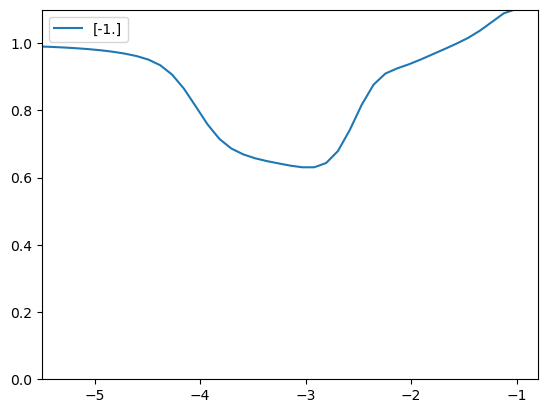

In [152]:
plt.plot(deltaS_list, absorption, label=offset*1e9)
plt.xlim(-5.5, -0.8)
plt.ylim(0, 1.1)
plt.legend()
plt.show()

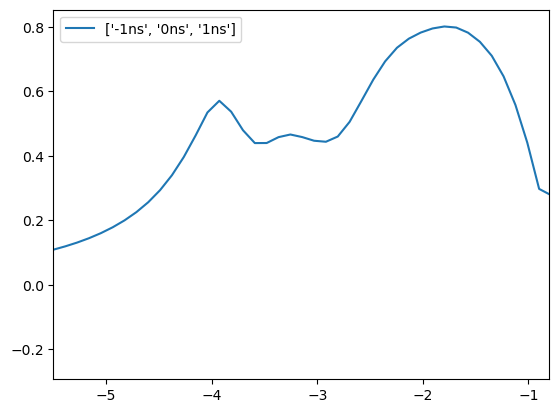

In [144]:
plt.plot(deltaS_list, -phase_shift_franson/np.pi, label=['-1ns', '0ns', '1ns'])
plt.xlim(-5.5, -0.8)
plt.legend()
plt.show()

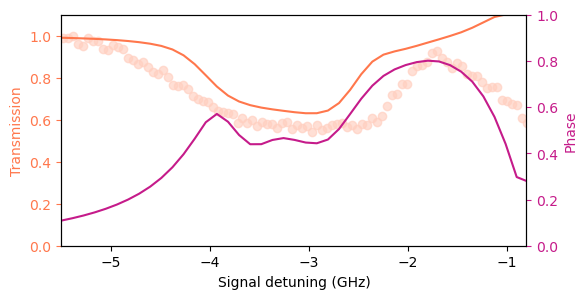

In [156]:
step = 50
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plotting the amplitude on the left y-axis
ax1.plot(deltaS_list, absorption, color='#FF774Cff')
ax1.scatter(freq[::step], transmission[::step], color='#FFCFC0aa')
ax1.set_xlabel('Signal detuning (GHz)')
ax1.set_ylabel('Transmission', color='#FF774Cff')
ax1.tick_params('y', colors='#FF774Cff')
ax1.set_ylim([0, 1.1])

# Creating a second y-axis for phase on the right
ax2 = ax1.twinx()
ax2.plot(deltaS_list, -phase_shift_franson/np.pi, color='#c51b8aff')
#ax2.plot(deltaS_list, phase_shift_franson/np.pi, color='pink')
ax2.set_ylabel('Phase', color='#c51b8aff')
ax2.tick_params('y', colors='#c51b8aff')
ax2.set_ylim([0, 1])

plt.xlim(-5.5, -0.8)

# Show the plot
plt.savefig('full_hyperfine_post_Franson_detector_smoothing_total_transmission_and_phase_shift.pdf') 
plt.show()

data_to_save = np.column_stack((deltaS_list, absorption, -phase_shift_franson/np.pi))
np.savetxt(f'full_hyperfine_post_Franson_detector_smoothing_total_transmission_and_phase_shift.txt', data_to_save)

# Import higher m data (OD = 5721, Omega_max=6)

Unpack contents of directory

In [126]:
directory = u'\\\\?\\R:\\home\\MEVeS\\Phase_switching\\Hyperfine_splitting_higher_m_OD=5721_Omega=6\\'

num_files = len(os.listdir(directory))

file_array = np.empty((num_files, 4), dtype=object) # [deltaS, deltaC, control_factor, file_name]

for i, file in enumerate(os.listdir(directory)):
    start = '_deltaS='
    end = '_deltaC'
    deltaS = float((file[file.find(start)+len(start):file.rfind(end)]).replace('p', '.'))
    start = '_deltaC='
    end = '_control'
    deltaC = float((file[file.find(start)+len(start):file.rfind(end)]).replace('p', '.'))
    start = '_control_factor='
    end = '.txt'
    control_factor = float((file[file.find(start)+len(start):file.rfind(end)]).replace('p', '.'))
    file_array[i] = [deltaS, deltaC, control_factor, file]

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\\\?\\R:\\home\\MEVeS\\Phase_switching\\Hyperfine_splitting_higher_m_OD=5721_Omega=6\\'

## Pick out single shot

In [ ]:
deltaS_list, deltaS_idx = np.unique(file_array[:, 0], return_index=True)
deltaC_list, deltaC_idx = np.unique(file_array[:, 1], return_index=True)
control_factor_list, control_factor_idx = np.unique(file_array[:, 2], return_index=True)

In [ ]:
dS = 0
dC = 0
cf = -3

print("deltaS = ", deltaS_list[dS])
print("deltaC = ", deltaC_list[dC])
print("control factor = ", control_factor_list[cf])

file = file_array[(file_array[:, 0] == deltaS_list[dS]) & (file_array[:, 1] == deltaC_list[dC]) & (file_array[:, 2] == control_factor_list[cf]), 3]

print("file to load = ", file[0])

deltaS =  -5.5
deltaC =  1.4
control factor =  0.9332121580963265
file to load =  absorption_deltaS=-5p5_deltaC=1p4_control_factor=0p9332121580963265.txt


In [ ]:
m = 5000
tend = 50e-9
t = np.linspace(0, tend, m)
ton = 1e-9

Eout = np.loadtxt(directory + file[0], dtype=complex)

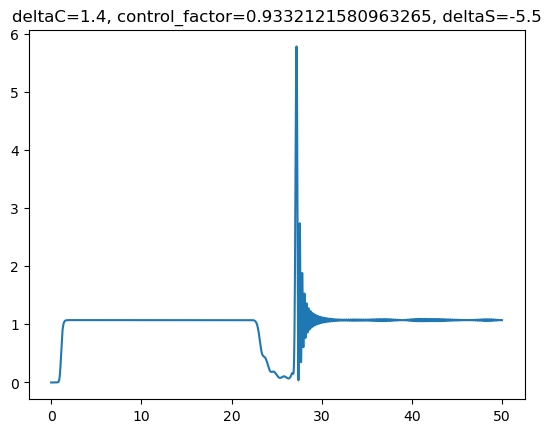

In [ ]:
plt.plot(t*1e9, np.abs(Eout[:, 0])**2 + np.abs(Eout[:, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.show()

## Pick out section

In [ ]:
dC = 9
cf = 13

print("deltaC = ", deltaC_list[dC])
print("control factor = ", control_factor_list[cf])

deltaC =  1.5894736842105264
control factor =  0.5368135804516109


In [ ]:
files = file_array[(file_array[:, 1] == deltaC_list[dC]) & (file_array[:, 2] == control_factor_list[cf]), 3]

print("files to load = ", files)

files to load =  ['absorption_deltaS=-4p040816326530612_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-2p693877551020408_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-4p714285714285714_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-0p7857142857142856_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-3p0306122448979593_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-1p0102040816326534_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-4p6020408163265305_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-4p4897959183673475_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-3p5918367346938775_deltaC=1p5894736842105264_control_factor=0p5368135804516109.txt'
 'absorption_deltaS=-1p4591836734693882_d

In [ ]:
Eout_array = np.zeros((len(files), m, 2), dtype=complex)
deltaS_list = np.zeros(len(files))

for i in range(len(files)):
    file = files[i]
    start = '_deltaS='
    end = '_deltaC'
    deltaS = float((file[file.find(start)+len(start):file.find(end)]).replace('p', '.'))
    deltaS_list[i] = deltaS
    Eout_array[i] =  np.loadtxt(directory + file, dtype=complex)

In [ ]:
idx = np.argsort(deltaS_list)

Eout_array = Eout_array[idx]
deltaS_list = deltaS_list[idx]

print("deltaS list = ", deltaS_list)

deltaS list =  [-5.5        -5.3877551  -5.2755102  -5.16326531 -5.05102041 -4.93877551
 -4.82653061 -4.71428571 -4.60204082 -4.48979592 -4.37755102 -4.26530612
 -4.15306122 -4.04081633 -3.92857143 -3.81632653 -3.70408163 -3.59183673
 -3.47959184 -3.36734694 -3.25510204 -3.14285714 -3.03061224 -2.91836735
 -2.80612245 -2.69387755 -2.58163265 -2.46938776 -2.35714286 -2.24489796
 -2.13265306 -2.02040816 -1.90816327 -1.79591837 -1.68367347 -1.57142857
 -1.45918367 -1.34693878 -1.23469388 -1.12244898 -1.01020408 -0.89795918
 -0.78571429 -0.67346939 -0.56122449 -0.44897959 -0.33673469 -0.2244898
 -0.1122449   0.        ]


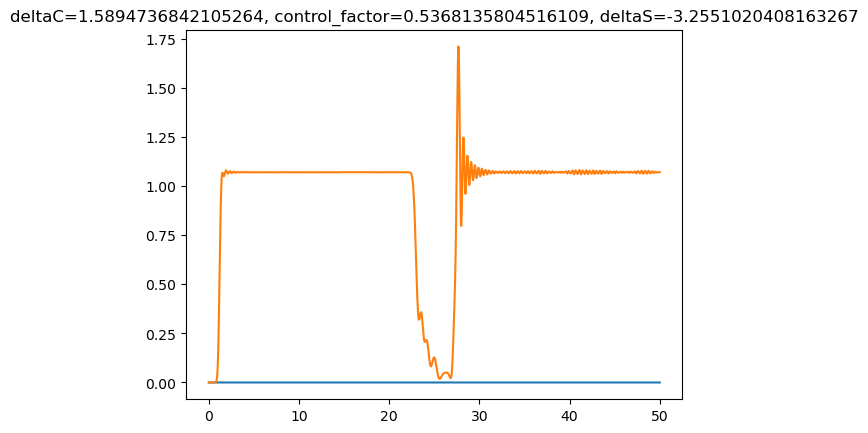

In [ ]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array[dS, :, 0])**2)
plt.plot(t*1e9, np.abs(Eout_array[dS, :, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.show()

In [ ]:
delay = 6 # ns

Eout_array_Franson = np.zeros((len(files), 2, m), dtype=complex)

for i in range(len(files)):
    Eout_array_Franson[i] = Franson_interferometer(Eout_array[i, :, 1], t, 0, delay*1e-9)

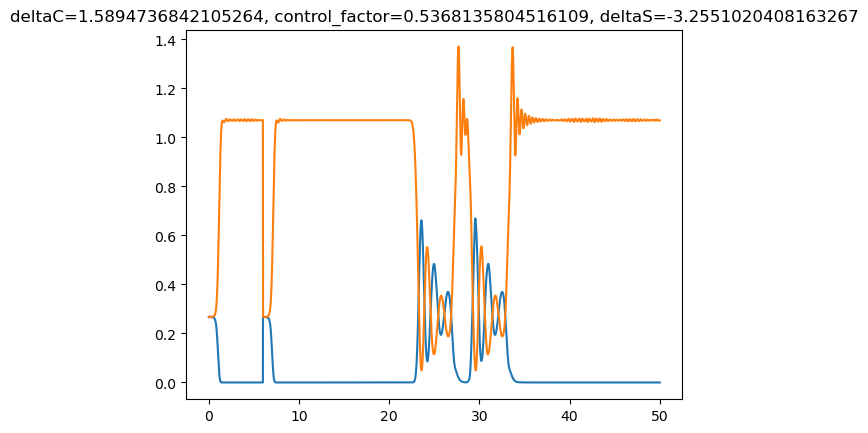

In [ ]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2)
plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.show()

In [ ]:
tw = 2
tc = 25

num_points = 4
offset = 0
times1 = 1e-9*np.linspace(tc-tw/2, tc+tw/2, num_points) + offset
times2 = 1e-9*np.linspace(tc-tw/2+delay, tc+tw/2+delay, num_points) + offset

points = np.array([np.argmin(np.abs(t[:, None] - times1[None, :]), axis=0), np.argmin(np.abs(t[:, None] - times2[None, :]), axis=0) ])

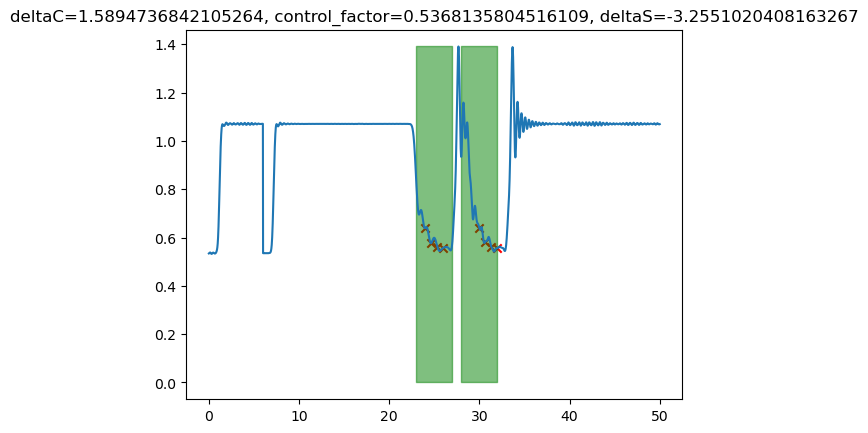

In [ ]:
dS = 20

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

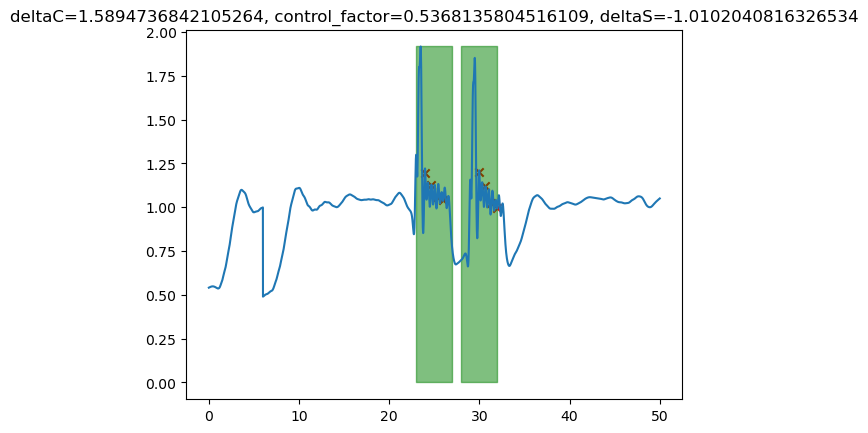

In [ ]:
dS = 40

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

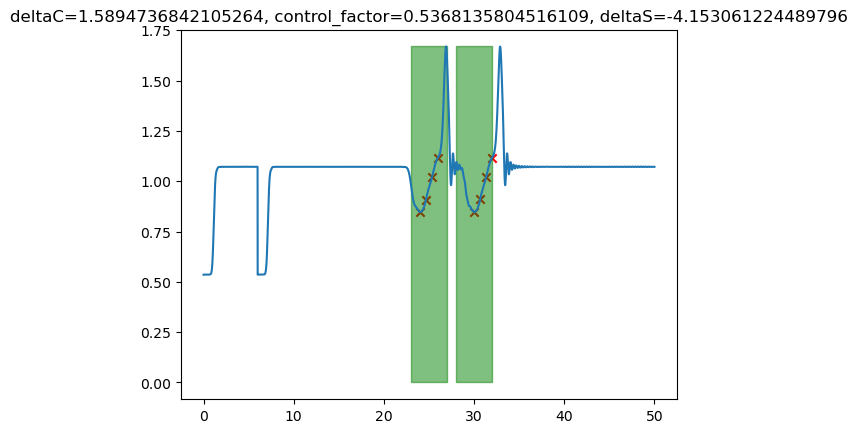

In [ ]:
dS = 12

plt.plot(t*1e9, np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)
plt.title(f'deltaC={deltaC_list[dC]}, control_factor={control_factor_list[cf]}, deltaS={deltaS_list[dS]}')
plt.scatter(t[points[0]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[0]], marker='x', color='r')
plt.scatter(t[points[1]]*1e9, (np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2)[points[1]], marker='x', color='r')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (25e-9+2e-9)) & (t > (25e-9-2e-9)), 
                alpha=0.5, color='green')
plt.fill_between(t*1e9, max(np.abs(Eout_array_Franson[dS, 0])**2 + np.abs(Eout_array_Franson[dS, 1])**2), where=(t < (30e-9+2e-9)) & (t > (30e-9-2e-9)), 
                alpha=0.5, color='green')
plt.show()

### Vary points by +/- 1 ns

In [ ]:
tw = 2
tc = 25

num_points = 4
offset = np.array([-1e-9, 0, 1e-9])
times1 = 1e-9*np.linspace(tc-tw/2, tc+tw/2, num_points)[None, :] + offset[:, None]
times2 = 1e-9*np.linspace(tc-tw/2+delay, tc+tw/2+delay, num_points)[None, :] + offset[:, None]

points = np.array([np.argmin(np.abs(t[:, None, None] - times1[None, :, :]), axis=0), np.argmin(np.abs(t[:, None, None] - times2[None, :, :]), axis=0) ]).transpose(1, 0, 2)

In [ ]:
points.shape # (offset, 1st/2nd bin, num_points)

(3, 2, 4)

In [ ]:
np.abs(Eout_array_Franson[:, 0, points.reshape(len(offset), -1)]).shape # (frequency, offset, points)

(50, 3, 8)

In [ ]:
absorption = np.sum(np.abs(Eout_array_Franson[:, 0, points.reshape(len(offset), -1)])**2 + 
                    np.abs(Eout_array_Franson[:, 1, points.reshape(len(offset), -1)])**2 , axis=-1) # (frequency, offset)
absorption = absorption/np.max(absorption[deltaS_list < -0.8, :], axis=0)

In [ ]:
absorption.shape

(50, 3)

In [ ]:
phase_on_franson = np.sum(2*np.arctan(np.sqrt((np.abs(Eout_array_Franson[:, 1, points.reshape(len(offset), -1)])**2)/(np.abs(Eout_array_Franson[:, 0, points.reshape(len(offset), -1)])**2))), axis=-1)/(2*num_points)

idx = np.argmin(np.abs(t-15e-9))
phase_off_franson = 2*np.arctan(np.sqrt(np.abs(Eout_array_Franson[:, 1, idx])**2)/(np.abs(Eout_array_Franson[:, 0, idx])**2))

phase_shift_franson = (phase_on_franson - phase_off_franson[:, None])

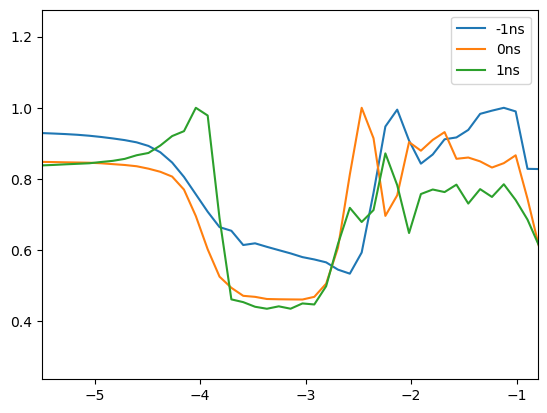

In [ ]:
plt.plot(deltaS_list, absorption, label=['-1ns', '0ns', '1ns'])
plt.xlim(-5.5, -0.8)
plt.legend()
plt.show()

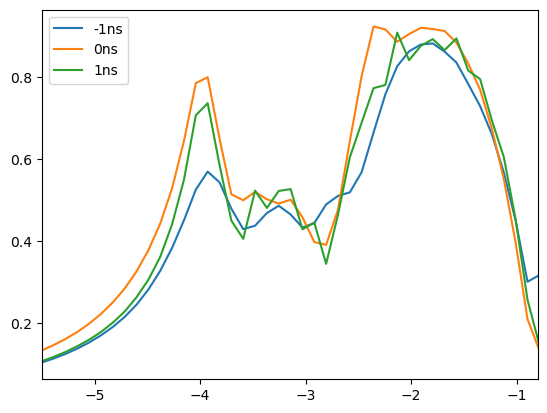

In [ ]:
plt.plot(deltaS_list, -phase_shift_franson/np.pi, label=['-1ns', '0ns', '1ns'])
plt.xlim(-5.5, -0.8)
plt.legend()
plt.show()